# Huawei Public Cloud dataset release demo notebook

This notebook explains how to load and use the Huawei Public dataset.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
from tqdm import tqdm

In [2]:
# define home dir
rt = 'datasets/public_dataset/'
print('Reading from directory: {}'.format(rt))

Reading from directory: datasets/public_dataset/


In [3]:
# get all per-second requests files

filenames_list = glob(rt+'/requests_minute/*.csv')
filenames_list.sort()
print(filenames_list[:5])
print('We have {} requests per second filenames'.format(len(filenames_list)))

['datasets/public_dataset//requests_minute/day_00.csv', 'datasets/public_dataset//requests_minute/day_01.csv', 'datasets/public_dataset//requests_minute/day_02.csv', 'datasets/public_dataset//requests_minute/day_03.csv', 'datasets/public_dataset//requests_minute/day_04.csv']
We have 26 requests per second filenames


In [4]:
# reading the all per-second requests files may take up to 40GB of memory
dfs_list = []
for filename in tqdm(filenames_list):
    # read the entire file, or read just the columns we want by passing usecols = ['time', 'day', 0, 1, 2] to pd.read_csv()
    df_i = pd.read_csv(filename, index_col=None)
    dfs_list.append(df_i)

100%|██████████| 26/26 [00:53<00:00,  2.08s/it]


In [5]:
df_requests = pd.concat(dfs_list)
df_requests

,day,time,0,1,2,3,4,5,6,7,...,5083,5084,5085,5086,5087,5088,5089,5090,5091,5092
0,0,0,NaN,NaN,NaN,6772,5996,NaN,1361,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,60,NaN,NaN,NaN,7244,6511,NaN,1551,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,120,NaN,NaN,NaN,5990,5412,NaN,1289,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,180,NaN,NaN,NaN,5742,5227,NaN,1285,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,240,NaN,NaN,NaN,4844,4377,NaN,1466,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,25,2246100,NaN,NaN,2.0,2308,790,NaN,3212,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1436,25,2246160,NaN,NaN,NaN,2701,918,NaN,3075,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1437,25,2246220,NaN,NaN,NaN,2891,1003,NaN,2752,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1438,25,2246280,NaN,NaN,NaN,2827,968,NaN,2836,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


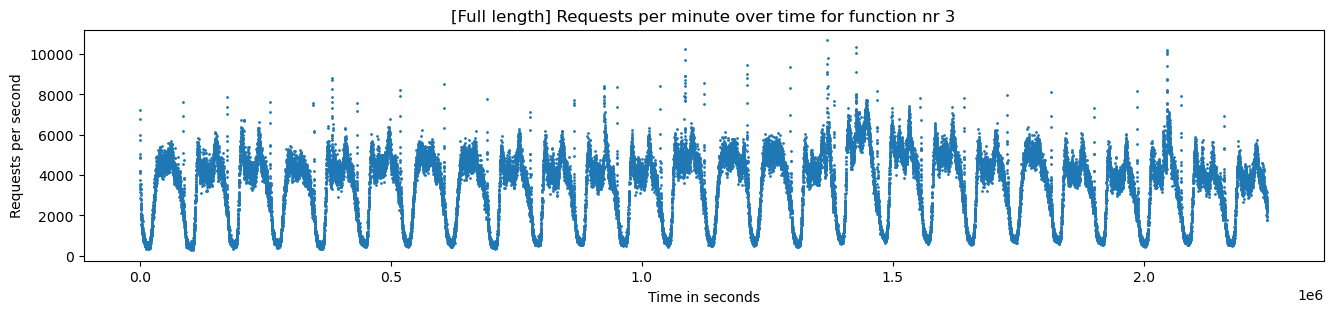

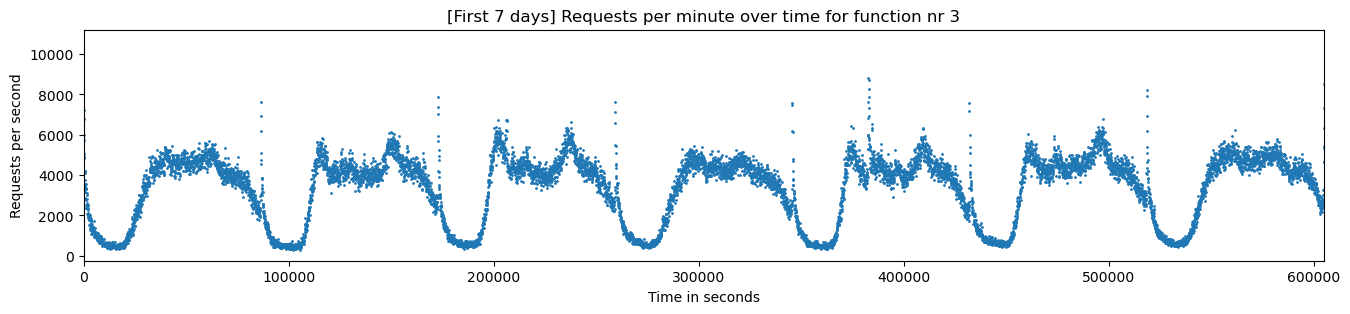

In [6]:
fig = plt.figure(figsize=(16, 3))

plt.scatter(df_requests['time'], df_requests['3'], s=1)
plt.xlabel('Time in seconds')
plt.ylabel('Requests per second')
plt.title('[Full length] Requests per minute over time for function nr 3')
plt.show()

n_days = 7
fig = plt.figure(figsize=(16, 3))
plt.scatter(df_requests['time'], df_requests['3'], s=1)
plt.xlabel('Time in seconds')
plt.ylabel('Requests per second')
plt.title('[First {} days] Requests per minute over time for function nr 3'.format(n_days))
plt.xlim(0, 86400*n_days)
plt.show()

## Sum of all requests

In this section we show how to sum all of the requests together

Note that in this dataset consists of 26 consecutive days of requests.


In [7]:
df_requests_for_plotting = df_requests.drop(columns = ['time', 'day'])

time_arr = df_requests['time'].to_numpy()
arr = df_requests_for_plotting.to_numpy()

In [8]:
print('We have {} minutes of data for {} functions'.format(arr.shape[0], arr.shape[1]))

We have 37440 minutes of data for 5093 functions


In [9]:
# Sum over all functions to get the total number of requests per minute
arr_sum = np.nansum(arr,axis=1)

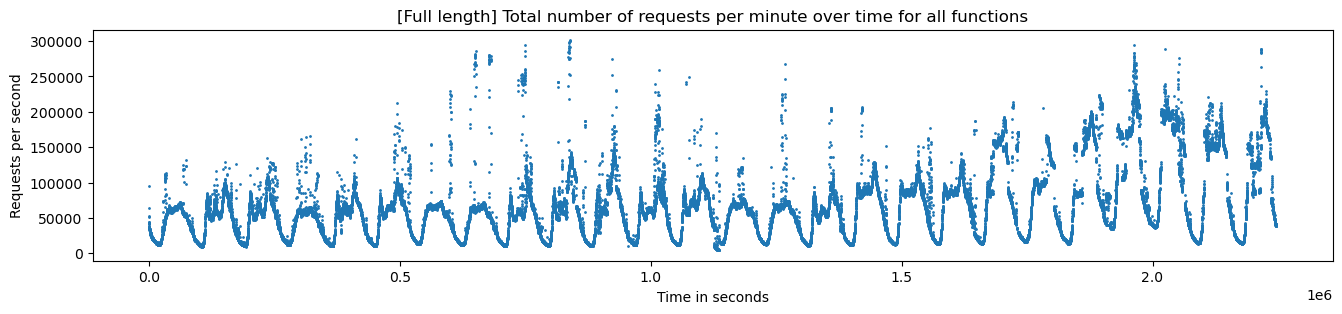

In [10]:
fig = plt.figure(figsize=(16, 3))

plt.scatter(time_arr, arr_sum, s=1)
plt.xlabel('Time in seconds')
plt.ylabel('Requests per second')
plt.title('[Full length] Total number of requests per minute over time for all functions')
plt.show()